## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 1: Naive Bayes
### Total Points: 100 points

You will be dealing with movie review data that includes both positive and negative reviews in this assignment. You will use Sentiment Analysis to assess if a given review is positive or negative using the provided dataset.

Therefore, we will make use of Naive Bayes algorithm to perform sentiment analysis on the movie review dataset.

## Importing the Libraries

In [1]:
import numpy as np
import math
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('omw-1.4')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Reading the data

When reading the data, ensure that the '.csv' file is in the same location where your jupyter notebook is used. This way the files are organized and easy to read using the pandas library. 

In [2]:
## Reading the data and removing columns that are not important. 
df = pd.read_csv("C:\\Datasets\\movie_reviews-1.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [3]:
# print head of data frame with help of head function
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


## Count plot of the output categories: positive or negative

Feel free to take a look at the output and whether the classes are balanced or imbalanced. 

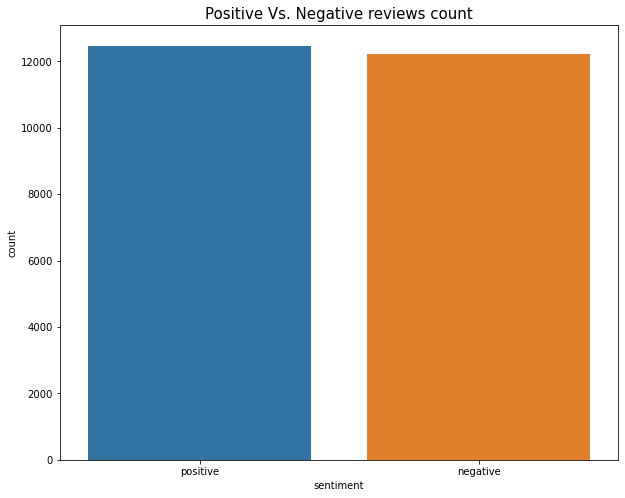

In [4]:
plt.figure(figsize = (10,8))
sns.countplot(x="sentiment", data=df)
plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()


## Upsampling the minority class: (5 points)

It is known that Naive bayes is not robust to class imbalance. It could be seen above that the data is little imbalanced. Therefore, class balancing can be done before giving it to the Naive Bayes model for prediction. 

Feel free to use 'resample' library from sklearn. 

In [5]:
## hint: use resample from sklearn.utils
from sklearn.utils import resample

df_majority = df[df['sentiment'] == 'positive']
df_minority = df[df['sentiment'] == 'negative']

negative_upsample = resample(df_minority, replace = True, 
                        n_samples = df_majority.shape[0],
                        random_state = 101)

df_upsampled = pd.concat([negative_upsample, df_majority])  # concat two data frames i,e majority class data set and upsampled minority class data set
df_upsampled = df_upsampled.sample(frac = 1)

In [6]:
## Just to ensure that upsampling was done successfully, take a look at the shape of the data in 
## this cell. 

# print the shape of data set with the help of shape function having "negative" as class label
df_upsampled[df_upsampled.sentiment=='negative'].shape

(12474, 2)

### Expected Output : 
(12474, 2)

In [7]:
## Ensure that the same number of data points are present for both 'positive' and 'negative' data

# print the shape of data set with the help of shape function having "positive" as class label
df_upsampled[df_upsampled.sentiment=='positive'].shape

(12474, 2)

### Expected Output : 
(12474, 2)

In [8]:
## In this cell, we are going to be dividing the data into train and test points
## Ensure that you store the upsampled data in a variable called 'df_upsampled' 
## so that the below operations are performed successfully


## Considering 10000 positive and 10000 negative data points
negative_data_points_train = df_upsampled[df_upsampled.sentiment=='negative'].iloc[:10000]
positive_data_points_train = df_upsampled[df_upsampled.sentiment=='positive'].iloc[:10000]

## Considering the remaining data points for test
negative_data_points_test = df_upsampled[df_upsampled.sentiment=='negative'].iloc[10000:]
positive_data_points_test = df_upsampled[df_upsampled.sentiment=='positive'].iloc[10000:]

## Concatenate the training positive and negative reviews
X_train = pd.concat([negative_data_points_train.review, positive_data_points_train.review])
## Concatenating the training positive and negative outputs
y_train = pd.concat([negative_data_points_train.sentiment, positive_data_points_train.sentiment])

## Concatenating the test positive and negative reviews
X_test = pd.concat([negative_data_points_test.review, positive_data_points_test.review])
## Concatenating the test positive and negative outputs
y_test = pd.concat([negative_data_points_test.sentiment, positive_data_points_test.sentiment])


In [9]:
## Take a look at the total number of classes and their count using '.value_counts()' for y_train and y_test.
## Ensure that there are equal number of positive and negative reviews. 
y_train.value_counts()

negative    10000
positive    10000
Name: sentiment, dtype: int64

### Expected Output:
negative    10000<br>
positive    10000<br>
Name: sentiment, dtype: int64

In [10]:
y_test.value_counts()

negative    2474
positive    2474
Name: sentiment, dtype: int64

### Expected Output : 
negative    2474<br>
positive    2474<br>
Name: sentiment, dtype: int64

## Q1. Pre-process the reviews: (10 points)

We know that a review contains links, punctuation, stopwords and many other words that don't give a lot of meaning for the Naive Bayes model for prediction. 

In the cell below, one must implement text-preprocessing and remove links, punctuations and stopwords. It is also important to lowercase the letters so that 'Admire' and 'admire' are not treated as different words. 

In addition to this, perform stemming operation so that similar words are reduced. To know more about stemming, feel free to take a look at this link.

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [11]:
# TASK CELL

stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_review(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 
        
    '''
    # Converting to lower case
    review = review.lower() 
    # removing the links
    review = re.sub(r'https?://\S+', '', review) 
    # removing the punctuations
    review = re.sub(r'[^\w\s]', '', review)
    # tokenizing 
    review = word_tokenize(review)
    # removing stop words
    review = [word for word in review if word not in stopwords]
    # Lemmatizing input 
    review_cleaned = [lemmatizer.lemmatize(w) for w in review]
    
    
    return review_cleaned

## Q2. Implement a find_occurrence function (5 points):

In this function, we find the total occurrence of a word giving information such as label, word and frequency dictionary.

Note that this function is used later in the code when we are going to be predicting the output using Naive Bayes. 

In [12]:
# TASK CELL
def find_occurrence(frequency, word, label):
    
    '''
    Params:
        frequency: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Return:
        n: the number of times the word with its corresponding label appears.
    '''
    n = frequency[(word,label)] if (word,label) in frequency.keys() else 0
  
    return n

### Converting output to numerical format:

We have outputs as 'positive' or 'negative'. In the cell below, we convert it to a numerical format. 

In [13]:
## With the use of mapping function, we replace
## the label in the form of string to an integer. 

output_map = {'positive': 0, 'negative': 1}
y_train = y_train.map(output_map)
y_test = y_test.map(output_map)

In [14]:
## Ensuring that there are equal number of classes on the training data. 
y_train.value_counts()

1    10000
0    10000
Name: sentiment, dtype: int64

In [15]:
## Choosing a random review and taking a look at it.
X_train.iloc[0]

'Turgid dialogue, feeble characterization - Harvey Keitel a judge? He plays more like an off-duty hitman - and a tension-free plot conspire to make one of the unfunniest films of all time. You feel sorry for the cast as they try to extract comedy from a dire and lifeless script. Avoid!'

From the above cell output, it could be seen that there are a lot of words that don't add a lot of meaning to the text. 

Therefore, those words would be removed. It also reduces the computation time. 

Therefore, it is a good practice we are following.

In [16]:
custom_review = X_train.iloc[0]

# print cleaned review
print(clean_review(custom_review))

['turgid', 'dialogue', 'feeble', 'characterization', 'harvey', 'keitel', 'judge', 'play', 'like', 'offduty', 'hitman', 'tensionfree', 'plot', 'conspire', 'make', 'one', 'unfunniest', 'film', 'time', 'feel', 'sorry', 'cast', 'try', 'extract', 'comedy', 'dire', 'lifeless', 'script', 'avoid']


We now use this function to pre-process the review and remove words that don't add a lot of meaning in our model. 

## Q3. Implementing review counter function: (5 points)

It is now time to implement the count function for the reviews. 

In this function, we count the occurrence of words and get the probabilities 
for the words based on the training data. 

In other words, we get the probability of occurrence of a word, given that the output is 'positive'.

Similarly, we also compute the probability of occurence of a word, given that the output is 'negative'.



In [17]:
# TASK CELL
def review_counter(output_occurrence, reviews, positive_or_negative):
    '''
    Params:
        output_occurrence: a dictionary that will be used to map each pair to its frequency
        reviews: a list of reviews
        positive_or_negative: a list corresponding to the sentiment of each review (either 0 or 1)
    Return:
        output: a dictionary mapping each pair to its frequency
    '''
    ## Steps :
    # define the key, which is the word and label tuple
    # if the key exists in the dictionary, increment the count
    # else, if the key is new, add it to the dictionary and set the count to 1
    
    for label, review in zip(positive_or_negative, reviews):
        split_review = clean_review(review)
        for word in split_review:
            if (word,label) in output_occurrence.keys():
                output_occurrence[(word,label)] += 1
            else:
                output_occurrence[(word,label)] = 1

    return output_occurrence
   


### Test your function with example reviews:

Feel free to run the cell below and understand whether the above function that you have defined is producing the optimum results. 

In [18]:
# Testing your function

result = {}
reviews = ['got bored throught the moview', 'The movie was fantastic', 'Will not watch it again', 'Was bored, it was a complete waste of time and money', 'Enjoyed the movie to the fullest']
ys = [1, 0, 1, 1, 0]
review_counter(result,reviews, ys)

{('got', 1): 1,
 ('bored', 1): 2,
 ('throught', 1): 1,
 ('moview', 1): 1,
 ('movie', 0): 2,
 ('fantastic', 0): 1,
 ('watch', 1): 1,
 ('complete', 1): 1,
 ('waste', 1): 1,
 ('time', 1): 1,
 ('money', 1): 1,
 ('enjoyed', 0): 1,
 ('fullest', 0): 1}

### Expected Output:
 {('bored', 1): 2, <br>
 ('complete', 1): 1, <br>
 ('enjoyed', 0): 1, <br>
 ('fantastic', 0): 1, <br>
 ('fullest', 0): 1, <br>
 ('got', 1): 1, <br>
 ('money', 1): 1, <br>
 ('movie', 0): 2, <br>
 ('moview', 1): 1, <br>
 ('throught', 1): 1, <br>
 ('time', 1): 1, <br>
 ('waste', 1): 1, <br>
 ('watch', 1): 1}

In [19]:
# Build the freqs dictionary for later uses

freqs = review_counter({}, X_train, y_train)

In [20]:
## Run this cell to get an idea about the corpus of words and their occurrence along with labels. 
## In this, we are computing the frequency of occurrence of word given that a review is 'positive'.
## Similarly, we also compute the frequence of occurence of word given that a review is 'negative'.
freqs

{('turgid', 1): 30,
 ('dialogue', 1): 849,
 ('feeble', 1): 20,
 ('characterization', 1): 74,
 ('harvey', 1): 32,
 ('keitel', 1): 17,
 ('judge', 1): 129,
 ('play', 1): 1354,
 ('like', 1): 8950,
 ('offduty', 1): 4,
 ('hitman', 1): 17,
 ('tensionfree', 1): 5,
 ('plot', 1): 3323,
 ('conspire', 1): 5,
 ('make', 1): 5069,
 ('one', 1): 10389,
 ('unfunniest', 1): 5,
 ('film', 1): 16764,
 ('time', 1): 5759,
 ('feel', 1): 1455,
 ('sorry', 1): 481,
 ('cast', 1): 1390,
 ('try', 1): 1388,
 ('extract', 1): 18,
 ('comedy', 1): 1305,
 ('dire', 1): 65,
 ('lifeless', 1): 63,
 ('script', 1): 1718,
 ('avoid', 1): 496,
 ('movie', 1): 22404,
 ('came', 1): 649,
 ('huge', 1): 371,
 ('disappointment', 1): 218,
 ('anime', 1): 68,
 ('series', 1): 909,
 ('ended', 1): 245,
 ('relatively', 1): 72,
 ('stupid', 1): 1159,
 ('twist', 1): 369,
 ('rushed', 1): 59,
 ('introduction', 1): 77,
 ('pretty', 1): 1710,
 ('lame', 1): 474,
 ('villain', 1): 350,
 ('expected', 1): 308,
 ('shamballa', 1): 3,
 ('tie', 1): 74,
 ('loose

## Q4. Training the Naive Bayes Model: (20 points)

Now we are in the training phase of the Naive Bayes algorithm. In this cell, take a look at the ways to calculate the log likelihood and log prior values as these are important for testing in the next few cells. 

Also calculate the frequency of occurrence of words where the output is negative. In the same way, calculate the word frequency count using the above functions in order to compute the log likelihood.

Return the logprior and loglikelihood output by the model from this function. 

In [21]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of reviews
        train_y: a list of labels correponding to the reviews (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0


    # calculate V, the number of unique words in the vocabulary
    vocab = set(list(zip(*freqs))[0])
    V = len(vocab)

    # calculate num_pos and num_neg - the total number of positive and negative words for all documents
    num_pos = num_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            num_pos = num_pos + freqs[pair]

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            num_neg = num_neg + freqs[pair]

    # Calculate num_doc, the number of documents
    num_doc = len(train_y)

    # Calculate D_pos, the number of positive documents 
    pos_num_docs = train_y.value_counts()[0]

    # Calculate D_neg, the number of negative documents 
    neg_num_docs = train_y.value_counts()[1]

    # Calculate logprior
    logprior = np.log(neg_num_docs/pos_num_docs)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = find_occurrence(freqs,word,0)
        freq_neg = find_occurrence(freqs,word,1)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (1 + freq_pos) / ((1*V) + num_pos)
        p_w_neg = (1 + freq_neg) / ((1*V) + num_neg)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_neg/p_w_pos)


    return logprior, loglikelihood

In [22]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything
logprior, loglikelihood = train_naive_bayes(freqs, X_train, y_train)
print(logprior)
print(len(loglikelihood))

0.0
91992


In [23]:
import pickle
# storing loglikelihood & logprior
with open('logprior.pkl', 'wb') as f:
    pickle.dump( logprior, f)
with open('loglikelihood.pkl', 'wb') as f:
    pickle.dump( loglikelihood, f)

### Expected Output 

0.0 <br>
91425

## Q5. Implementing Naive Bayes Predict Function: (10 points)

It is now time to make our prediction as to whether a given review is negative or positive respectively. 

After adding the log likelihood values, ensure that the output is 1 (negative) if the sum of the log likelihood value is greater than 0 and 0 (positive) if the sum of the log likelihood is less than or equal to 0. 

In [24]:
# TASK 4 CELL

def naive_bayes_predict(review, logprior, loglikelihood):
    '''
    Params:
        review: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Return:
        total_prob: the sum of all the loglikelihoods of each word in the review (if found in the dictionary) + logprior (a number)

    '''
    
      # process the review to get a list of words
    word_l = clean_review(review)

    # initialize probability to zero
    total_prob = 0

    # add the logprior
    total_prob = total_prob + logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            total_prob = total_prob + loglikelihood[word]


    return 1 if total_prob>0 else 0

In [25]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Experiment with your own review.
my_review = "I thought this series was going to be another fun, action series with some dynamic plots and great performances. I was wrong. While I like Jamie Denton, this show is hardly worth watching at all, unless you enjoy watching some people brutalized and the actions of the agents supposedly warranted under the theme of national security. The show is great propaganda for the current government, and spews out jingoism as though we talk that way every day. After a couple of episodes, it was boring the hell out of me, and I started watching reruns of House Invaders on BBCAmerica instead. Rather watch CSI and Without a Trace, without a doubt."
p = naive_bayes_predict(my_review, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1


### Expected Output :
The expected output is 1

## Q6. Implementing Naive Bayes Test function: (10 points)

In this function, implement the previous functions such as naive_bayes_predict to get the predictions for the test set. 

In addition to this, the function should return the total number of reviews that it correctly classified as 'positive' or 'negative'. 

In [26]:
# UNQ_C6 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    """
    Input:
        test_x: A list of reviews
        test_y: the corresponding labels for the list of reviews
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of reviews classified correctly)/(total # of reviews)
    """
    accuracy = 0  

    
    y_hats = []
    for review in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(review, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.absolute(y_hats-test_y))

    accuracy = 1 - error


    return accuracy

In [27]:
# For grading purpose only
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Run this cell to test your function

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = naive_bayes_predict(review, logprior, loglikelihood)
    print(f'{review[:100]} -> {p:.2f}')
    

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 0.00
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 1.00
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 0.00
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 1.00


### Expected Output :

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 0.00 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 1.00<br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 0.00 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 1.00



In [28]:
# Feel free to check the sentiment of your own review below
my_review = 'The moview was very boring, I wanted to leave in the middle'
naive_bayes_predict(my_review, logprior, loglikelihood)

1

### Expected Output :
1

# Q7. Evaluate the accuracy (10 Points)
1. Split your data into training and test sets using random selection. Set the seed as parameter of the function so that user can select a different training and test set by changing seed.

2. Calculate model paramters with training set.

3. Print confusion matrix for training and test set.

4. Examine False Positive and False Negative cases and provide reasoning why they get misclassified.

#### Q7.1) Split your data into training and test sets using random selection. Set the seed as parameter of the function so that user can select a different training and test set by changing seed.

In [29]:
from sklearn.utils import shuffle

# using shuffle from sklearn to shuffle the dataset and also setting random seed 

df_shuffled = shuffle(df_upsampled, random_state=45)

## Considering 10000 positive & negative data points
negative_data_points_train = df_shuffled[df_shuffled['sentiment'] == 'negative'].iloc[:10000]
positive_data_points_train = df_shuffled[df_shuffled['sentiment'] == 'positive'].iloc[:10000]

## Considering the remaining data points for test
negative_data_points_test = df_shuffled[df_shuffled['sentiment'] == 'negative'].iloc[10000:]
positive_data_points_test = df_shuffled[df_shuffled['sentiment'] == 'positive'].iloc[10000:]

## Concatenate the training positive and negative reviews
X_train = pd.concat([negative_data_points_train['review'], positive_data_points_train['review']])
## Concatenating the training positive and negative outputs
y_train = pd.concat([negative_data_points_train['sentiment'], positive_data_points_train['sentiment']])

## Concatenating the test positive and negative reviews
X_test = pd.concat([negative_data_points_test['review'], positive_data_points_test['review']])
## Concatenating the test positive and negative outputs
y_test = pd.concat([negative_data_points_test['sentiment'], positive_data_points_test['sentiment']])

output_map = {'positive': 0, 'negative': 1}
y_train = y_train.map(output_map)
y_test = y_test.map(output_map)

#### 7.2)  Calculate model paramters with training set.

In [30]:
freqs_n = review_counter({}, X_train, y_train)

# getting logprior and loglikihood and storing it in NB 
NB = train_naive_bayes(freqs_n, X_train, y_train)

In [31]:
# saving logprior and logliklihood in local file (.pkl - pickle file )
import pickle
with open('NB.pickle', 'wb') as f:
    pickle.dump(NB, f)

In [32]:
# loading model parameters from local file 
with open('NB.pickle', 'rb') as f:
     data = pickle.load(f)
data

(0.0,
 {'hammered': -0.7044877506823382,
  'allblackcast': -0.7044877506823379,
  'chandu': 0.9049501617517622,
  'hadleys': -1.1099528587905023,
  'toying': -0.2990226425741737,
  'stillrelevant': 0.6818066104375526,
  'levered': 0.6818066104375526,
  'contemplation': -0.5991272350245117,
  'buddybuddy': 0.3941245379857716,
  'pooreras': -0.7044877506823379,
  'rei': -1.1099528587905023,
  'movietill': -0.7044877506823379,
  'reverberating': -0.7044877506823379,
  'obnoxious': 1.1307568304854556,
  'wirework': -0.4168056782305571,
  'heifitz': -0.7044877506823379,
  'pharmacy': -1.1099528587905023,
  'normalos': -0.7044877506823379,
  '3d': 0.35638421000292464,
  'venturing': -0.2990226425741737,
  'rakoff': 0.6818066104375526,
  'handcuffing': -0.7044877506823379,
  'bet': 0.5403070481638531,
  'workart': -0.7044877506823379,
  'sophias': -0.011340570122392642,
  'bioports': -0.7044877506823379,
  'atrociously': 1.1926322342035431,
  'hoskins': 0.8759626248785098,
  'snobbish': -0.46

#### 7.3) Print confusion matrix for training and test set.

In [33]:
# getting the predictions 
y_hat = []
for i in X_train:
    y_hat.append(naive_bayes_predict(i,NB[0],NB[1]))

In [34]:
# confusion matrix for traning set
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_train, y_hat)
cnf_matrix

array([[9417,  583],
       [ 529, 9471]], dtype=int64)

In [35]:
# training set accuracy 
test_naive_bayes(X_train, y_train, NB[0], NB[1])

0.9444

In [36]:
y_hat_t = []
for i in X_test:
    y_hat_t.append(naive_bayes_predict(i,NB[0],NB[1]))

In [37]:
# confusion matrix for test set
cnf_matrix = confusion_matrix(y_test, y_hat_t)
cnf_matrix

array([[2216,  258],
       [ 307, 2167]], dtype=int64)

In [38]:
# test set accuracy 
test_naive_bayes(X_test, y_test, NB[0], NB[1])

0.8858124494745352

#### 7.4) Examine False Positive and False Negative cases and provide reasoning why they get misclassified.

In [39]:
dfs = pd.DataFrame()
dfs['test'] = X_test
dfs = dfs.reset_index()
y_t = y_test.reset_index()
dfs['y_test'] = y_t['sentiment']
dfs['y_predict'] = y_hat_t
dfs.to_csv('analyzes.csv')

In [40]:
dfs

,index,test,y_test,y_predict
0,13512,"Well, EYEboy, I must say that it pleases me to...",1,1
1,17245,A potentially good idea gets completely let do...,1,1
2,24069,While most of Wayne's B efforts are entertaini...,1,1
3,22347,I thought maybe a film which boasted a cast in...,1,1
4,916,Mickey Rourke hunts Diane Lane in Elmore Leona...,1,0
...,...,...,...,...
4943,17134,I tuned in to this movie because there was not...,0,1
4944,18977,"""The Case of the Scorpion's Tail"" has all the ...",0,0
4945,4824,This film is not really a remake of the 1949 O...,0,1
4946,6631,"I bought this movie a few days ago, and though...",0,0


In [41]:
my_review = 'While Im normally a big fan of John Turturros work as an actor and director, ILLUMINATA is a great disappointment. Although the film has some charming moments, overall it falls flat. Worst of all, the film is confusing. Where is the movie set? Italy or an Italian troupe in New York? Why bother making a historical film if it fails to convey a setting? If you want to see a well-made, inspiring historical film also about theater, go see Tim Robbins THE CRADLE WILL ROCK. This movie has many pluses, including a fine performance by John Turturro.'
naive_bayes_predict(my_review, logprior, loglikelihood)

0

The review above is an example of a false positive; it is clear from the review that it was misclassified due to multipolarity because the word "huge fan" likely caused the predictor to classify the review as positive even though it was unable to comprehend its context. Later in the review, it is noted as a "huge disappointment," which the classifier missed.

In [42]:
my_review = 'It isnt the worst film ever made, the actors arent apalling and the script and director are not completely inept. <br /><br />It isnt the best film ever made, the actors arent excellent and the script and director are not completely brilliant.<br /><br />It falls somewhere in the middle. A fun somewhere. An enjoyable, well constructed somewhere.<br /><br />No need to say "dont take it seriously" or "so bad its good" or "it wasnt scary". None of these comments are relevant. <br /><br />Cut has atmosphere. Its that atmosphere which is actually very unique, and the one really original aspect of the movie, which personally is what makes the film, for me.'
naive_bayes_predict(my_review, logprior, loglikelihood)

1

Because of the sarcasm employed in this review, the one above is an example of a fake negative. A different explanation might include poor negation detection. The emotion classifier was baffled by the claim that this isn't the best movie ever made.

In [43]:
my_review= 'This is a typical Sandra Bullock movie in which she plays a mousy (but profane) woman who is in trouble but finds a way to survive and be the hero. Sound familiar? <br /><br />There are plenty of holes in this story. Things just dont add up and some of the suspense is a little corny. But - that suspense is very good. There is a lot of tension in this story which has strong paranoia running through it. The story starts off slow but kicks in pretty soon and stays that way, making it an involving movie for the viewer. That is why I give it a pretty good rating - the movie gets you involved in it. Bullock is more cute than annoying, which she normally is to me, so this is my highest-rated movie with her in it.'
naive_bayes_predict(my_review, logprior, loglikelihood)

1

This review is an illustration of a false negative. This review is quite ambiguous because it initially criticizes the film before giving it a high rating. Another illustration of word ambiguity is this.

### After analyzing many false negatives and false positives , I found the following 4 main reasons for false negatives and false positives 

#### 1. One reason for False positive could be use of sarcasm. 

People use sarcastic writing to express their negative emotions in a positive way. As a result, sarcasm can easily trick sentiment analysis systems unless they are specifically designed to take it into account.

#### 2. Faulty Negation Detection could be reason for False negative.
A method for flipping the polarity of words, phrases, and even whole sentences is negation. Many linguistic criteria are used by researchers to determine whether negation is occurring, but it's also crucial to identify the words that are impacted by negation terms. The scope of the sentence "The show was not interesting," for instance, is limited to the word that comes after the negation word. The effect of the negation word "not," however, lasts just until the end of sentences like "I do not call this movie a comedy movie." Positive or negative terms that are included in the negation shift from their original meaning and take on the opposite polarity.

#### 3. Word Ambiguity is another reason for FP and FN 
It is challenging to develop a universal opinion lexicon containing polarities for all words because word polarity varies by domain. For instance:

“The story is unpredictable.”
“The steering wheel is unpredictable.”
These two instances demonstrate how context impacts the emotion of opinion words. The word polarity "unpredictable" is anticipated to be positive in the first scenario. The identical term has a negative polarity in the second.

#### 4. Multipolarity - reason for FP and FN 

Let's look at an illustration with multiple polarities: "My new laptop's audio quality is amazing, but the colors on the screens aren't that great."
Some sentiment analysis models will give this sentence a neutral or negative valence.

https://www.toptal.com/deep-learning/4-sentiment-analysis-accuracy-traps

# Q8. Modularize your calssifier (10 points)
1. Convert your code into a python module text_classifier.py

2. The user should be able to launch the application on command prompt using python test_classifier.py command. The module will automatically load the model paramters from a local file of your choice and be ready to take the input from user on command prompt. The program will preprocess user input, tokenize and predict the class.

3. Your module will take the input from user and output sentiment class in an indefinite loop. The output should printout the probabilities for each input token along with the final classification decision. Program will quit if user enters X.


**Attached the files**

# Q9. Theory Questions: (10 points)

1. Why is Laplace Smoothing or Additive Smoothing required while executing Naive Bayes operations, especially for text classification? Show how not having additive smoothing leads to bad outcomes by using an example of training and the test set. (10 points)


2. Why are logarithmic values computed instead of only probability values in the Naive Bayes algorithm? (5 points)

#### Q9.1) Why is Laplace Smoothing or Additive Smoothing required while executing Naive Bayes operations, especially for text classification?

When implementing naive bayes, laplace smoothing is necessary since some words in the input text might not be in the training set, making it impossible to assess their likelihood, let alone disregard it or treat it as zero. Both will produce false results.

Ignoring the term means we are assigning it probability of 1 -> Not correct

If likelihood is considered 0 means, the probability of entire text becomes 0 -> Not correct

This problem is solved by laplace smoothing. It is a a method of smoothing that addresses Naive Bayes' issue with zero probability. It does this by increasing the zero probability values to a small positive number and decreasing other values in proportion, keeping the sum at 1.

Since not all words may be present in the training set for text categorization, laplace smoothing is particularly crucial. Suppose we had to categorize email as spam or ham, for instance. Without utilizing laplace smoothing, we won't be able to accurately identify the text if the input email contains a word that isn't in the training set.

In [44]:
#### Without Laplace smoothing traning function

def train_naive_bayes_ls(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of reviews
        train_y: a list of labels correponding to the reviews (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0


    # calculate V, the number of unique words in the vocabulary
    vocab = set(list(zip(*freqs))[0])
    V = len(vocab)


    # calculate num_pos and num_neg - the total number of positive and negative words for all documents
    num_pos = num_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
             num_pos = num_pos + freqs[pair]

        # else, the label is negative
        else:
                # increment the number of negative words by the count for this (word,label) pair
            num_neg = num_neg + freqs[pair] 

    # Calculate num_doc, the number of documents
    num_doc = len(train_y)

    # Calculate D_pos, the number of positive documents 
    pos_num_docs = train_y.value_counts()[0]

    # Calculate D_neg, the number of negative documents 
    neg_num_docs = train_y.value_counts()[1]

    # Calculate logprior
    logprior = np.log(neg_num_docs/pos_num_docs)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = find_occurrence(freqs,word,0)
        freq_neg = find_occurrence(freqs,word,1)

        # without laplace smoothing
        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos) / (num_pos) 
        p_w_neg = (freq_neg) / (num_neg)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_neg/p_w_pos)


    return logprior, loglikelihood

In [45]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything
logprior, loglikelihood = train_naive_bayes_ls(freqs, X_train, y_train)
print(logprior)
print(len(loglikelihood))

ZeroDivisionError: float division by zero

Because some of the words never appear in the train or test set and have 0 probability, the model will throw an error if it is trained without employing laplace smoothing, as was seen above. Because we cannot divide by zero any number, the code raises an error.

#### Q9.2) Why are logarithmic values computed instead of only probability values in the Naive Bayes algorithm? 

Probabilities can have values ranging from 0 to 1. When we add many of these probabilities together, the naive Bayes method yields an extremely small number that frequently cannot be stated as a double or long double. Typically, log-probabilities are used as a remedy for this problem. The factors given make the log-probabilities function neatly.

The log of the product is the sum of the logs, just as we can add the logs. The resulting sums (rather than products in the case of probabilities) are often manageable, as opposed to the exceedingly small number in the case of just probabilities.

Because probability is always between 0 and 1, log-probabilities have a significantly larger range than [0,1], between -inf and 0.

Comparing prob = comparing log probabilites a < b ~ log(a) < log(b)